<a href="https://colab.research.google.com/github/dochrishistrange/bitsbot/blob/main/RAGmodelbulletin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BITS_Bulletin**

#  Importing libraries

In [ ]:
!pip install langchain
!pip install -U langchain-community
!pip install pdfplumber
!pip install chromadb
!pip install -U -q google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.7 MB/s eta 

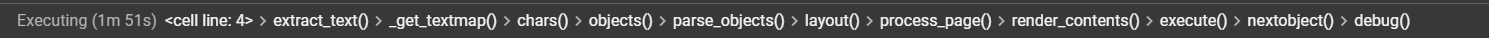

## **Downgrade the versions for preventing the invoke error**

In [ ]:
!pip install langchain-google-genai==2.1.3
!pip install google-ai-generativelanguage==0.6.17

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.18
    Uninstalling google-ai-generativelanguage-0.6.18:
      Successfully uninstalled google-ai-generativelanguage-0.6.18
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.17 which is incompatible.


In [ ]:
import google.generativeai as genai #using gemini and its embedings
from google.colab import userdata #for ease in hiding api key
from IPython.display import Markdown #for nice display

# Code

In [ ]:
import pdfplumber
pdf = pdfplumber.open("/content/IT-Final-version-PS-I-chronicles.pdf")
text = ""
for sheet in pdf.pages:
  text = text + sheet.extract_text()

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ".", "!", "?", " ", ""],#this does not imply, that at every fullstop and \n it will split, rather it will use this paramters to do so keeping in mind the chunk size
    chunk_size=600,
    chunk_overlap=100, #to ensure preservation of context
    length_function=len

)
texts = text_splitter.split_text(text)
texts[200]

'25Name: UTKARSH BHASKAR .(2021B3A71610H) ................................................................................ 342\nPS-I station: FinMapp (Fininfinity Technologies Pvt. Ltd.) - Tech , Gurugram ......................................... 343\nStudent .................................................................................................................................................. 343\nName: VIDIT BUBNA .(2021B3A72494P) .......................................................................................... 343'

## Cleaning

In [ ]:
res = []
for sub in texts:
    text1 = sub.replace("\n", " ")
    text2 = text1.replace(".", "")
    res.append(text2)

In [ ]:
texts = res

In [ ]:
texts[200]

'25Name: UTKARSH BHASKAR (2021B3A71610H)  342 PS-I station: FinMapp (Fininfinity Technologies Pvt Ltd) - Tech , Gurugram  343 Student  343 Name: VIDIT BUBNA (2021B3A72494P)  343'

In [ ]:
Google_api_key = userdata.get('gemini-api') #its ur gateway, special key to communicate with gemini and request it to help u out
genai.configure(api_key=Google_api_key)

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model = "models/text-embedding-004", google_api_key=Google_api_key)

## Vector Store

In [ ]:
from langchain.vectorstores import Chroma
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k": 10})

In [ ]:
from langchain.chains import RetrievalQA
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains.question_answering import load_qa_chain

In [ ]:
model = ChatGoogleGenerativeAI(model = "gemini-2.0-flash", google_api_key=Google_api_key, temperature = 0.3, convert_system_message_to_human = True)

In [ ]:
import warnings
# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, message="Convert_system_message_to_human will be deprecated!")

In [ ]:
from langchain.prompts import PromptTemplate
template = """
{context}
Question; {question}
Helpful answer: """
QA_chain_prompt = PromptTemplate.from_template(template)
qa_chain = RetrievalQA.from_chain_type(
    llm = model,
    retriever = vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_chain_prompt}
)

#when i detailed the template to solely stick to the context, which it is already doing by default, it turned out to giving stricter outputs, often missing some imp data
#like what was the official cg cutoff. so I didnt pressurize it much!

## Put your question in the box below!

In [ ]:
question = "name the companies offering online internships"
result = qa_chain.invoke({"query": question}) #langchain says, invoke is the new way to speak now.
Markdown(result["result"])

Based on the provided text snippets, here are the companies offering online internships:

*   **Arbunize digital media (sister company Getboarded)**
*   **MapmyIndia**